# Orthogonal projections

MAT1120, September 30, 2024

In [1]:
%matplotlib notebook

In [2]:
import matplotlib.pyplot as plt
import matplotlib.animation as anm
from ipywidgets import interact

In [3]:
import numpy as np
import numpy.linalg as la

projection from $R^3$ to the subspace $W$ defined by $x + y + z = 0$

orthonormal basis of $W$ given by $u_1 = (1, 0, -1) / \sqrt{2}$ and $u_2 = (-1, 2, -1) / \sqrt{6}$

In [4]:
u1 = np.array([1,0,-1]) / np.sqrt(2)
u2 = np.array([-1,2,-1]) / np.sqrt(6)

In [5]:
def proj_to_plane(input_vec):
    # orthogonal projection computed from u1 and u2
    return np.inner(u1, input_vec) * u1 + np.inner(u2, input_vec) * u2

In [6]:
def rescaled_ratio(x, y, z, rat):
    # helper function to compute arrow head size
    the_vec = np.array([x, y, z])
    vec_len = np.sqrt(np.inner(the_vec, the_vec))
    if vec_len == 0:
        return rat
    return rat / vec_len

In [7]:
# mesh for the subspace W
X = np.arange(-1, 1.01, 0.25)
Y = np.arange(-1, 1.01, 0.25)
X, Y = np.meshgrid(X, Y)
Z = -(X + Y)
Z[Z>1]=np.nan
Z[Z<-1]=np.nan

<IPython.core.display.Javascript object>


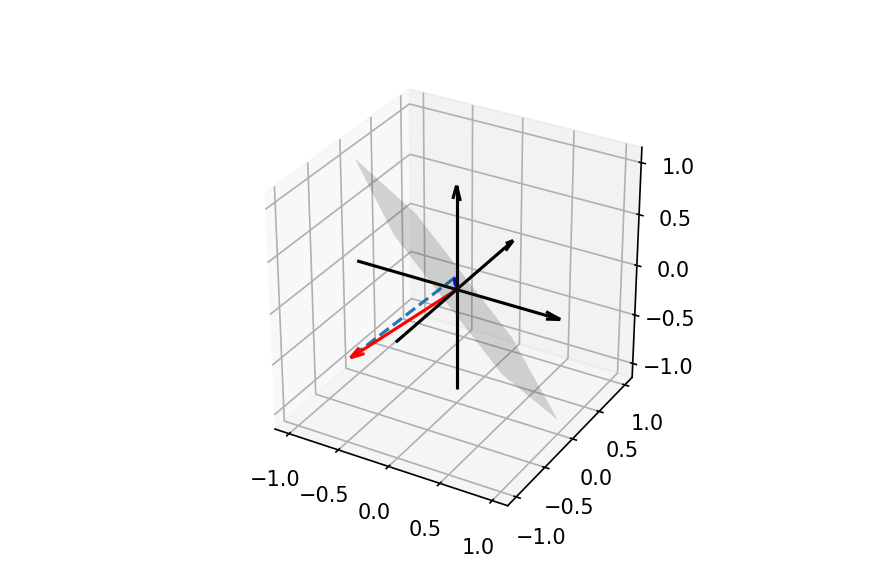

interactive(children=(FloatSlider(value=0.5, description='x', max=0.9, min=-0.9), FloatSlider(value=0.4, descr…

<function __main__.show_graph1(x=0.5, y=0.4, z=0.0)>

In [8]:
fig1 = plt.figure()

def show_graph1(x=0.5, y=0.4, z=0.0):
    the_vec = np.array([x, y, z])
    proj_vec = proj_to_plane(the_vec)
    px = proj_vec[0]
    py = proj_vec[1]
    pz = proj_vec[2]
    print("projected vector: %s" % proj_vec)
    plt.figure(fig1)
    plt.clf()
    cur_ax = fig1.add_subplot(projection="3d")
    cur_ax.plot_surface(X,Y,Z,color='gray',alpha=0.2)
    cur_ax.quiver(-1, 0, 0, 2, 0, 0, color='black', arrow_length_ratio=0.07)
    cur_ax.quiver(0, -1, 0, 0, 2, 0, color='black', arrow_length_ratio=0.07)
    cur_ax.quiver(0, 0, -1, 0, 0, 2, color='black', arrow_length_ratio=0.07)
    cur_ax.quiver(0, 0, 0, x, y, z, color='red', arrow_length_ratio=rescaled_ratio(x,y,z,0.14))
    cur_ax.quiver(0, 0, 0, px, py, pz, color='blue', arrow_length_ratio=rescaled_ratio(px,py,pz,0.14))
    cur_ax.plot([px, x], [py, y], [pz, z], linestyle='dashed')
    cur_ax.set_xlim((-1.1,1.1))
    cur_ax.set_ylim((-1.1,1.1))
    cur_ax.set_zlim((-1.1,1.1))
    cur_ax.set_box_aspect((1, 1, 1))
    plt.show()

interact(show_graph1, x=(-0.9,0.9), y=(-0.9,0.9), z=(-0.9,0.9))

geometric way to understand the projection: closest vector in W

In [9]:
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)

<IPython.core.display.Javascript object>


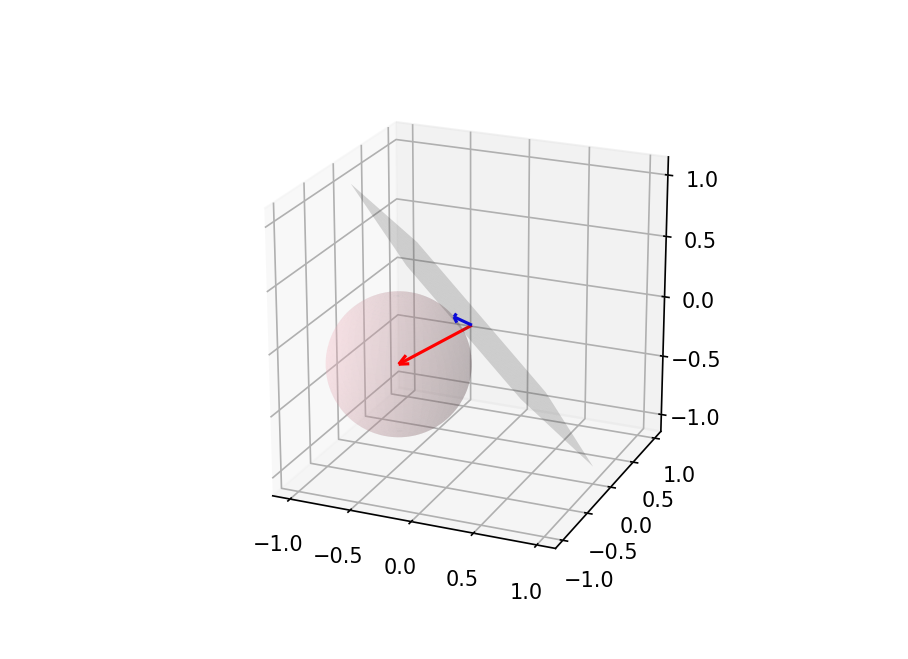

interactive(children=(FloatSlider(value=0.5, description='x', max=0.9, min=-0.9), FloatSlider(value=0.4, descr…

<function __main__.show_graph1(x=0.5, y=0.4, z=0.0)>

In [10]:
fig2 = plt.figure()

def show_graph1(x=0.5, y=0.4, z=0.0):
    the_vec = np.array([x, y, z])
    proj_vec = proj_to_plane(the_vec)
    px, py, pz = proj_vec[0], proj_vec[1], proj_vec[2]
    print("projected vector: %s" % proj_vec)
    dist = np.sqrt((x - px)**2 + (y - py)**2 + (z - pz)**2)
    print("distance: %s" % dist)
    sph_x = x + dist * np.outer(np.cos(u), np.sin(v))
    sph_y = y + dist * np.outer(np.sin(u), np.sin(v))
    sph_z = z + dist * np.outer(np.ones(np.size(u)), np.cos(v))
    plt.figure(fig2)
    plt.clf()
    cur_ax = fig2.add_subplot(projection="3d")
    cur_ax.plot_surface(X,Y,Z,color='gray',alpha=0.2)
    cur_ax.plot_surface(sph_x, sph_y, sph_z, color='pink', alpha=0.2)
    cur_ax.quiver(0, 0, 0, x, y, z, color='red', arrow_length_ratio=rescaled_ratio(x,y,z,0.14))
    cur_ax.quiver(0, 0, 0, px, py, pz, color='blue', arrow_length_ratio=rescaled_ratio(px,py,pz,0.14))
    cur_ax.set_xlim((-1.1,1.1))
    cur_ax.set_ylim((-1.1,1.1))
    cur_ax.set_zlim((-1.1,1.1))
    cur_ax.set_box_aspect((1, 1, 1))
    plt.show()

interact(show_graph1, x=(-0.9,0.9), y=(-0.9,0.9), z=(-0.9,0.9))

combine projections to the directions of orthonormal basis

<IPython.core.display.Javascript object>


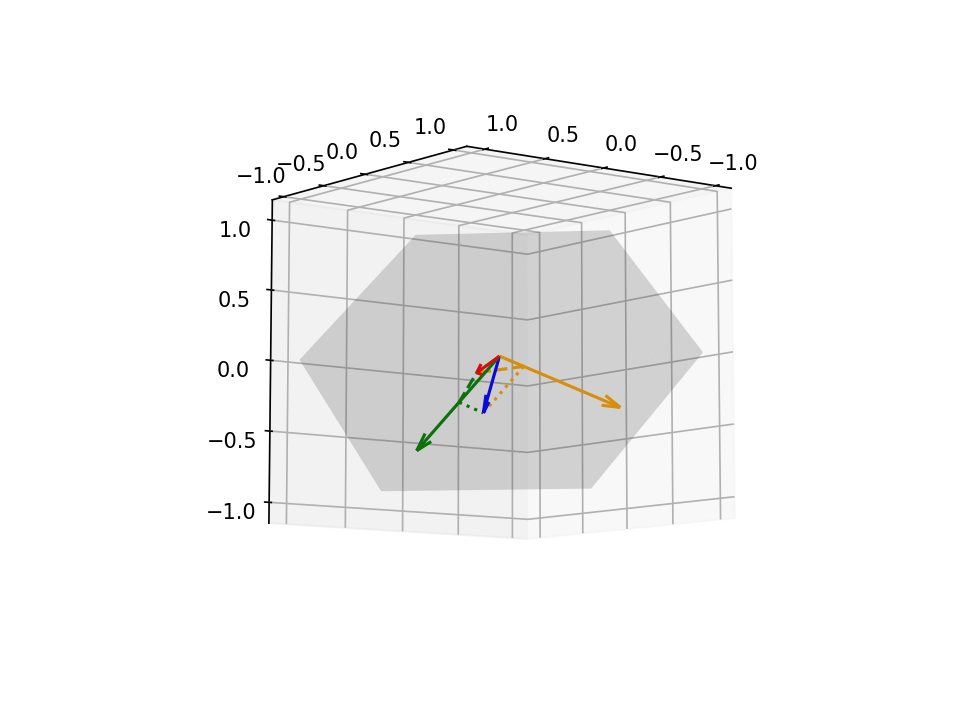

interactive(children=(FloatSlider(value=0.5, description='x', max=0.9, min=-0.9), FloatSlider(value=0.4, descr…

<function __main__.show_graph1(x=0.5, y=0.4, z=0.0)>

In [11]:
fig3 = plt.figure()

def show_graph1(x=0.5, y=0.4, z=0.0):
    the_vec = np.array([x, y, z])
    u1_scaled = np.inner(u1, the_vec) * u1
    print("inner product with u1 = [1, 0, -1]/sqrt(2): %s" % np.inner(u1, the_vec))
    u1sx, u1sy, u1sz = u1_scaled[0], u1_scaled[1], u1_scaled[2]
    u2_scaled = np.inner(u2, the_vec) * u2
    print("inner product with u2 = [-1, 2, -1]/sqrt(6): %s" % np.inner(u2, the_vec))
    u2sx, u2sy, u2sz = u2_scaled[0], u2_scaled[1], u2_scaled[2]
    proj_vec = proj_to_plane(the_vec)
    px, py, pz = proj_vec[0], proj_vec[1], proj_vec[2]
    print("projected vector: %s" % proj_vec)
    plt.figure(fig3)
    plt.clf()
    cur_ax = fig3.add_subplot(projection="3d")
    cur_ax.plot_surface(X,Y,Z,color='gray',alpha=0.2)
    cur_ax.quiver(0,0,0,1/np.sqrt(2),0,-1/np.sqrt(2), color='green', arrow_length_ratio=0.14)
    cur_ax.quiver(0,0,0,-1/np.sqrt(6),2/np.sqrt(6),-1/np.sqrt(6), color='orange', arrow_length_ratio=0.14)
    cur_ax.quiver(0, 0, 0, x, y, z, color='red', arrow_length_ratio=rescaled_ratio(x,y,z,0.14))
    cur_ax.quiver(0, 0, 0, px, py, pz, color='blue', arrow_length_ratio=rescaled_ratio(px,py,pz,0.14))
    cur_ax.plot([u1sx, x], [u1sy, y], [u1sz, z], color='green', linestyle='dashed')
    cur_ax.plot([u1sx, px], [u1sy, py], [u1sz, pz], color='green', linestyle='dotted')
    cur_ax.plot([u2sx, x], [u2sy, y], [u2sz, z], color='orange', linestyle='dashed')
    cur_ax.plot([u2sx, px], [u2sy, py], [u2sz, pz], color='orange', linestyle='dotted')
    cur_ax.set_xlim((-1.1,1.1))
    cur_ax.set_ylim((-1.1,1.1))
    cur_ax.set_zlim((-1.1,1.1))
    cur_ax.set_box_aspect((1, 1, 1))
    plt.show()

interact(show_graph1, x=(-0.9,0.9), y=(-0.9,0.9), z=(-0.9,0.9))